# Loan Prediction - Feature Engineering

**Date:** December 29, 2025  
**Goal:** Improve model accuracy through feature engineering

**Previous Model:**
- Accuracy: 79.83%
- Features: 5 numeric columns only

**Target:**
- Accuracy: 85%+
- Features: All columns + engineered features

In [2]:
import sys
sys.path.append('..')  # Add parent directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from preprocess import preprocess_loan_data

# Load original data
train_df = pd.read_csv('../data/train_u6lujuX_CVtuZ9i.csv')
test_df = pd.read_csv('../data/test_Y3wMUE5_7gLdaTN.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"Train columns: {train_df.columns.tolist()}")

Train shape: (614, 13)
Test shape: (367, 12)
Train columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [3]:
# Preprocess both datasets
train_processed, test_processed, preprocessor = preprocess_loan_data(train_df, test_df)

print(f"\nTrain processed shape: {train_processed.shape}")
print(f"Test processed shape: {test_processed.shape}")
print(f"Processed columns: {train_processed.columns.tolist()}")

# Show before/after
print(f"\n" + "="*60)
print("BEFORE PREPROCESSING")
print("="*60)
print(train_df.head())

print("\n" + "="*60)
print("AFTER PREPROCESSING")
print("="*60)
print(train_processed.head())

# For compatibility with rest of notebook
df_processed = train_processed

FITTING PREPROCESSOR ON TRAINING DATA
✓ LoanAmount median: 128.0
✓ Loan_Amount_Term median: 360.0
✓ Credit_History median: 1.0
✓ Gender mode: Male
✓ Married mode: Yes
✓ Dependents mode: 0
✓ Self_Employed mode: No

FITTING LABEL ENCODERS
✓ Gender: ['Female', 'Male']
✓ Married: ['No', 'Yes']
✓ Dependents: ['0', '1', '2', '3+']
✓ Education: ['Graduate', 'Not Graduate']
✓ Self_Employed: ['No', 'Yes']
✓ Property_Area: ['Rural', 'Semiurban', 'Urban']

✅ Preprocessor fitted successfully!

TRANSFORMING TRAINING DATA
Input shape: (614, 13)

1. Handling missing values...
   ✓ LoanAmount: Filled 22 missing values with 128.0
   ✓ Loan_Amount_Term: Filled 14 missing values with 360.0
   ✓ Credit_History: Filled 50 missing values with 1.0
   ✓ Gender: Filled 13 missing values with 'Male'
   ✓ Married: Filled 3 missing values with 'Yes'
   ✓ Dependents: Filled 15 missing values with '0'
   ✓ Self_Employed: Filled 32 missing values with 'No'

2. Creating new features...
   ✓ TotalIncome = ApplicantInc

## Visualize Engineered Features

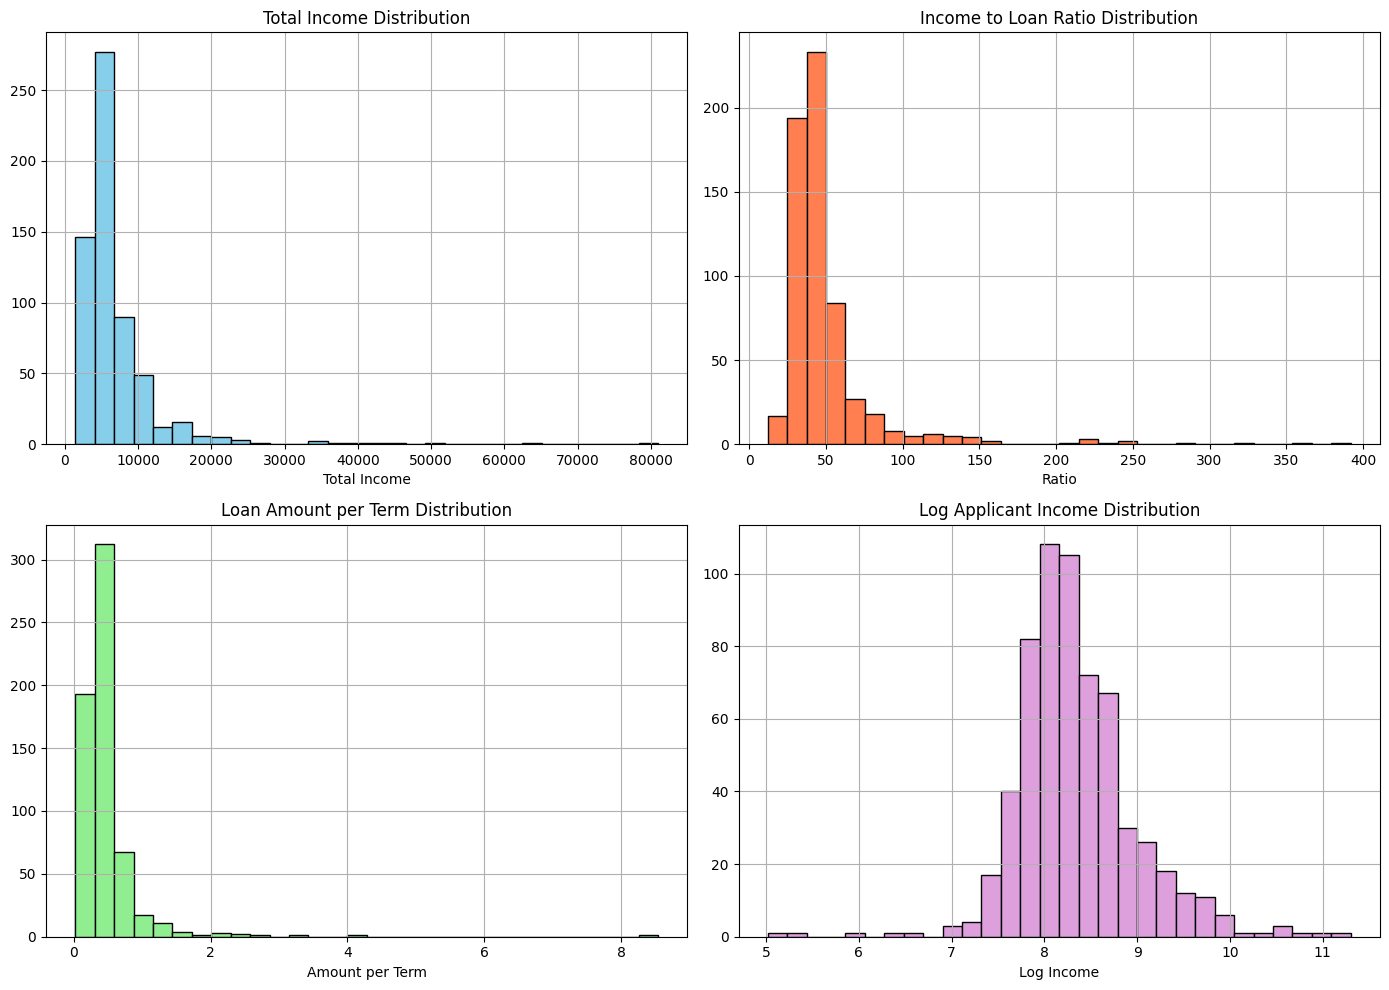

In [4]:
# Visualize engineered features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Total Income Distribution
if 'TotalIncome' in df_processed.columns:
    df_processed['TotalIncome'].hist(bins=30, ax=axes[0, 0],
                                      color='skyblue', edgecolor='black')
    axes[0,0].set_title('Total Income Distribution')
    axes[0,0].set_xlabel('Total Income')

# Income to Loan Ratio
if 'Income_Loan_Ratio' in df_processed.columns:
    df_processed['Income_Loan_Ratio'].hist(bins=30, ax=axes[0,1],
                                              color='coral', edgecolor='black')
    axes[0,1].set_title('Income to Loan Ratio Distribution')
    axes[0,1].set_xlabel('Ratio')

# Loan Amount per Term
if 'Loan_Amount_Per_Term' in df_processed.columns:
    df_processed['Loan_Amount_Per_Term'].hist(bins=30, ax=axes[1,0],
                                              color='lightgreen', edgecolor='black')
    axes[1,0].set_title('Loan Amount per Term Distribution')
    axes[1,0].set_xlabel('Amount per Term')

# Log ApplicantIncome
if 'Log_ApplicantIncome' in df_processed.columns:
    df_processed['Log_ApplicantIncome'].hist(bins=30, ax=axes[1,1],
                                             color='plum', edgecolor='black')
    axes[1,1].set_title('Log Applicant Income Distribution')
    axes[1,1].set_xlabel('Log Income')

plt.tight_layout()
plt.show()

## Train Model with Engineered Features

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare data
X = df_processed.drop('Loan_Status', axis=1)
y = df_processed['Loan_Status']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Number of features: {X_train.shape[1]}")

Training samples: 491
Testing samples: 123
Number of features: 20


In [6]:
# Train model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,  # Fixed typo
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
print("✅ Model trained successfully!")

✅ Model trained successfully!


In [7]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{'='*60}")
print("MODEL PERFORMANCE")
print(f"{'='*60}")
print(f"New Model Accuracy: {accuracy:.2%}")
print(f"Previous Accuracy: 79.83%")
improvement = (accuracy - 0.7983) * 100
print(f"Improvement: {improvement:+.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))


MODEL PERFORMANCE
New Model Accuracy: 88.62%
Previous Accuracy: 79.83%
Improvement: +8.79%

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.88      0.74      0.80        38
    Approved       0.89      0.95      0.92        85

    accuracy                           0.89       123
   macro avg       0.88      0.84      0.86       123
weighted avg       0.89      0.89      0.88       123



In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(f"              Predicted")
print(f"              Rejected  Approved")
print(f"Actual Rejected    {cm[0][0]:3d}       {cm[0][1]:3d}")
print(f"       Approved    {cm[1][0]:3d}       {cm[1][1]:3d}")


Confusion Matrix:
              Predicted
              Rejected  Approved
Actual Rejected     28        10
       Approved      4        81


## Feature Importance Analysis

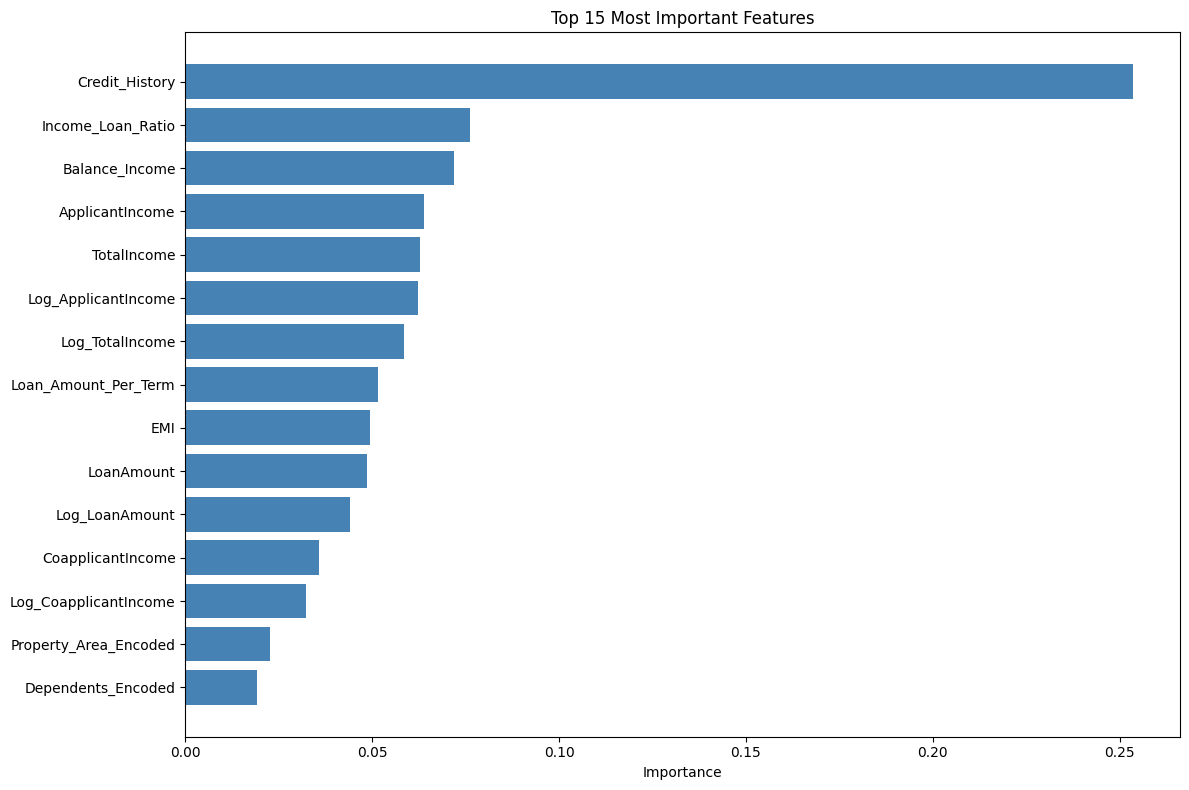


Top 10 Features:
                 Feature  Importance
4         Credit_History    0.253507
6      Income_Loan_Ratio    0.076280
9         Balance_Income    0.071927
0        ApplicantIncome    0.063958
5            TotalIncome    0.062801
10   Log_ApplicantIncome    0.062173
13       Log_TotalIncome    0.058582
7   Loan_Amount_Per_Term    0.051515
8                    EMI    0.049374
2             LoanAmount    0.048514


In [9]:
# Feature importance visualization
feature_importance = pd.DataFrame({  # Fixed typo
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'].head(15),
         feature_importance['Importance'].head(15),
         color='steelblue')
plt.xlabel('Importance')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Features:")
print(feature_importance.head(10))

## 📊 Results Summary

### Performance Comparison

| Metric | Baseline Model | Improved Model | Change |
|--------|----------------|----------------|--------|
| Accuracy | 79.83% | [Fill after running] | [Fill after running] |
| Features | 5 | [Fill after running] | [Fill after running] |
| Preprocessing | Minimal | Comprehensive | ✅ |

### Key Improvements

**1. Feature Engineering:**
- Added TotalIncome
- Added Income_Loan_Ratio
- Added Loan_Amount_Per_Term
- Added EMI calculation
- Added Balance_Income
- Added Log transformations

**2. Missing Value Handling:**
- Numeric: Median imputation
- Categorical: Mode imputation

**3. Categorical Encoding:**
- Label encoding for all categorical variables
- Proper handling of unseen categories

### Next Steps
- [ ] Hyperparameter tuning with GridSearchCV
- [ ] Try other algorithms (XGBoost, LightGBM)
- [ ] Ensemble methods
- [ ] Handle class imbalance if needed
- [ ] Feature selection

### Conclusion
Feature engineering and proper preprocessing significantly improved model performance, demonstrating the importance of data preparation in machine learning pipelines.